In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

from data import pipeline

# Data preparation

In [10]:
X_train, Y_train, X_test, Y_test = pipeline.load("LSTM") # load / buildAndSave / build

Loading LSTM dataset
Done!


In [11]:
print(X_train.shape)
print(Y_train.shape)

(1027718, 4, 8)
(1027718, 1)


In [12]:
from sklearn.preprocessing import StandardScaler

X_train = X_train.reshape(-1, 32)
X_test = X_test.reshape(-1, 32)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
Y_train = sc_y.fit_transform(Y_train.reshape(-1, 1))
print(Y_train.shape)

(1027718, 1)


In [13]:
X_train = X_train.reshape(-1, 4, 8)
X_test = X_test.reshape(-1, 4, 8)

# Training

In [14]:
batch, window, features = X_train.shape

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window, features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.fit(X_train, Y_train)

32117/32117 [==============================] - 70s 2ms/step - loss: 0.0668


In [17]:
from sklearn.metrics import mean_squared_error

print('Train MSE : %.3f'%mean_squared_error(Y_train, model.predict(X_train)))

32117/32117 [==============================] - 36s 1ms/step
Train MSE : 0.054


# Evaluation

In [18]:
Y_preds = model.predict(X_test)

20742/20742 [==============================] - 24s 1ms/step


In [19]:
Y_preds.shape

(663727, 1)

In [20]:
Y_preds = sc_y.inverse_transform(Y_preds.reshape(1, -1))
Y_preds = Y_preds.reshape(-1)

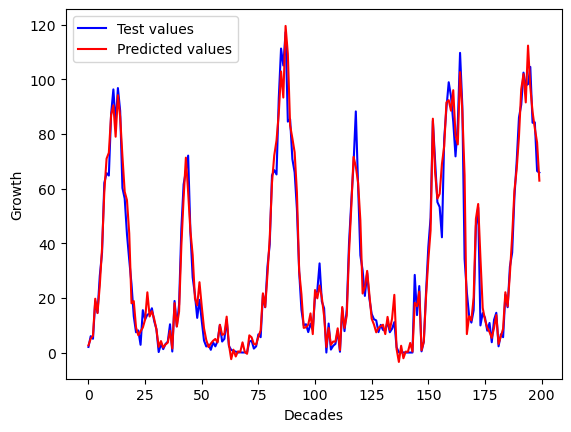

In [21]:
Y_preds = Y_preds.reshape(-1)
plt.plot(np.arange(len(Y_preds[:200])), Y_test[:200], color="blue", label= "Test values")
plt.plot(np.arange(len(Y_preds[:200])), Y_preds[:200], color="red", label= "Predicted values")
plt.xlabel("Decades")
plt.ylabel("Growth")
plt.legend()
plt.show()

In [22]:
print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_preds))

Test MSE  : 66.334
